# 1 문제정의

## 미국의 인구조사 데이터(1994)를 바탕으로 만들어진 데이터## 
이 데이터에서 각 사람의 소득을 예측하려는 것이 목적## 
나이 , 결혼여부 , 직종 등의 컬럼이 
```
레이블(타깃)은 연소득이 $50,000  초과(>50K)  or 이하(<=50k)으로 구분됨(컬럼명 : income)
평가 기준은 ROC-AUC로 평가
제출 파일은 예측값만 result.csv 파일로 생성해 제출(컬럼명 : pr)`
`
### 문제풀이 
[!] 사람이 가진 다양한 정보들(특징들-독립변수) 를 보고 연봉이 $50,000 이상인지 이하인지를 예측하는 문제임

입력(Input, X - 독립변수 ): 나이, 결혼여부, 직종, 학력, 근무시간 등 개인 속성. 출력(Output, y - 종속변수): 소득이 >50K 인지 <=50K 인지 (이진 값).
``` , 1개)있음

# 2 라이브러리 가져오기

In [1]:


# 판다스 라이브러리
import pandas as pd

# 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# train = pd.read_csv('https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch2/train.csv')
# test = pd.read_csv('https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch2/test.csv')

train


,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,3331,34.0,State-gov,177331,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,Black,Male,4386,0,40.0,United-States,>50K
1,19749,58.0,Private,290661,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40.0,United-States,<=50K
2,1157,48.0,Private,125933,Some-college,10,Widowed,Exec-managerial,Unmarried,Black,Female,0,1669,38.0,United-States,<=50K
3,693,58.0,Private,100313,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,1902,40.0,United-States,>50K
4,12522,41.0,Private,195661,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,54.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29299,15999,28.0,Private,47168,10th,6,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,40.0,United-States,<=50K
29300,21604,44.0,Local-gov,231793,Doctorate,16,Married-spouse-absent,Prof-specialty,Unmarried,White,Female,0,0,38.0,United-States,<=50K
29301,26839,41.0,Local-gov,201435,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,40.0,United-States,<=50K
29302,16681,43.0,Private,137722,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40.0,United-States,<=50K


# 탐색적 데이터 분석 (EDA)

In [ ]:
# train.head()

# train.tail(15)

train.sample(5)

In [ ]:
# 데이터 크기 확인
train.shape, test.shape

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(8,4))

# 행 개수
rows = [train.shape[0], test.shape[0]]
axes[0].bar(['Train_rows','Test_rows'], rows)
for i, v in enumerate(rows):
    axes[0].text(i, v, f"{v/sum(rows):.1%}", ha='center', va='bottom')
axes[0].set_title("Rows")

# 열 개수
cols = [train.shape[1], test.shape[1]]
axes[1].bar(['Train_cols','Test_cols'], cols)
for i, v in enumerate(cols):
    axes[1].text(i, v, f"{v/sum(cols):.1%}", ha='center', va='bottom')
axes[1].set_title("Columns")

plt.tight_layout()
plt.show()



In [ ]:
# 자료형 타입 확인
train.info()

In [ ]:
# 자료형 시각화
dtype_counts = train.dtypes.value_counts()
plt.pie(dtype_counts.values, labels=dtype_counts.index, autopct='%1.1f%%')
plt.title('Data Types Distribution')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

mem_mb = train.memory_usage(deep=True, index=False) / 1024**2
total = mem_mb.sum()

bars = plt.bar(range(len(train.columns)), mem_mb, width=0.6)
plt.title(f'Memory Usage by Column (MB) - Total: {total:.2f} MB')
plt.xticks(range(len(train.columns)), train.columns, rotation=90)
plt.gca().bar_label(bars, fmt="%.2f MB", fontsize=7)
plt.tight_layout()
plt.show()

In [ ]:
train.describe()

In [ ]:

# --------------------------
# 시각화 - 박스플롯 - 박스플롯이란 : https://yoon1seok.tistory.com/38
# --------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 컬럼만 추출
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 6))
sns.boxplot(data=train[numeric_cols], orient="h", palette="Set2")
plt.title("Boxplots of numeric features (train)")
plt.tight_layout()
plt.show()


In [ ]:
# =============================================================================
# 필요한 라이브러리 임포트
# =============================================================================
import matplotlib.pyplot as plt    # 그래프 생성을 위한 라이브러리
import seaborn as sns              # 통계 시각화 라이브러리 (matplotlib 기반)
import numpy as np                 # 수치 계산 라이브러리
import pandas as pd                # 데이터 프레임 조작 라이브러리
from matplotlib.gridspec import GridSpec  # subplot 레이아웃 관리

def analyze_distribution(data, col):
    """
    데이터 분포 분석 및 시각화 함수
    
    Parameters:
    - data: DataFrame, 분석할 데이터
    - col: str, 분석할 컬럼명
    
    기능:
    1. 기술통계량 계산 (평균, 표준편차, 분위수 등)
    2. 아웃라이어 탐지
    3. 분포 시각화 (히스토그램 + 통계선들)
    4. 요약 테이블 생성
    """
    
    # =============================================================================
    # 1. 데이터 전처리 - 결측치 제거
    # =============================================================================
    data_clean = data[col].dropna()  # NaN 값 제거한 깨끗한 데이터
    
    # =============================================================================
    # 2. 기본 통계량 계산
    # =============================================================================
    stats = {
        'mean': data_clean.mean(),        # 평균 (μ)
        'std': data_clean.std(),          # 표준편차 (σ)
        'q1': data_clean.quantile(0.25),  # 1사분위수 (25%)
        'q2': data_clean.quantile(0.5),   # 2사분위수 (중위수, 50%)
        'q3': data_clean.quantile(0.75)   # 3사분위수 (75%)
    }
    
    # =============================================================================
    # 3. IQR 기반 아웃라이어 경계값 계산
    # =============================================================================
    stats.update({
        'iqr': stats['q3'] - stats['q1'],                           # IQR (사분범위)
        'lower_bound': stats['q1'] - 1.5 * (stats['q3'] - stats['q1']),  # 하한선
        'upper_bound': stats['q3'] + 1.5 * (stats['q3'] - stats['q1'])   # 상한선
    })
    
    # =============================================================================
    # 4. 아웃라이어 탐지
    # =============================================================================
    # 아웃라이어 마스크: 하한선 미만 또는 상한선 초과인 데이터 찾기
    outlier_mask = (data_clean < stats['lower_bound']) | (data_clean > stats['upper_bound'])
    
    # 아웃라이어 데이터프레임 생성 (인덱스, 컬럼명, 값 포함)
    outliers_df = data_clean[outlier_mask].to_frame(col).reset_index().rename(columns={'index': 'Row'})
    
    # =============================================================================
    # 5. 요약 통계 테이블 생성
    # =============================================================================
    summary = pd.DataFrame({
        'Metric': [
            'Mean (mu)', 'Std (sigma)', 'Q1 (25%)', 'Q2 (Median)', 'Q3 (75%)', 
            'IQR (Q3-Q1)', 'Outlier Count', 'Outlier Ratio (%)', 
            'Lower Bound (Q1-1.5*IQR)', 'Upper Bound (Q3+1.5*IQR)'
        ],
        'Value': [
            stats['mean'], stats['std'], stats['q1'], stats['q2'], stats['q3'], 
            stats['iqr'], len(outliers_df), 
            round(len(outliers_df)/len(data_clean)*100, 2) if len(data_clean) else 0,
            stats['lower_bound'], stats['upper_bound']
        ]
    })
    
    # 각 통계 지표 설명:
    # - Mean (mu): 데이터의 산술평균, 중심위치 나타냄
    # - Std (sigma): 표준편차, 데이터의 퍼짐 정도 (작을수록 집중)
    # - Q1 (25%): 1사분위수, 데이터를 오름차순 정렬했을 때 25% 지점
    # - Q2 (Median): 2사분위수(중위수), 50% 지점, 평균보다 이상값에 덜 민감
    # - Q3 (75%): 3사분위수, 75% 지점
    # - IQR (Q3-Q1): 사분범위, Q3-Q1으로 중간 50% 데이터의 범위
    # - Outlier Count: IQR 방법으로 탐지된 이상값 개수
    # - Outlier Ratio (%): 전체 데이터 대비 이상값 비율
    # - Lower Bound: 이상값 판정 하한선 (Q1-1.5*IQR)
    # - Upper Bound: 이상값 판정 상한선 (Q3+1.5*IQR)
    
    # =============================================================================
    # 6. 시각화 레이아웃 설정 (2x2 그리드)
    # =============================================================================
    fig = plt.figure(figsize=(16, 6))  # 전체 figure 크기 설정
    # GridSpec: 왼쪽은 넓게(분포도), 오른쪽은 좁게(테이블들)
    gs = GridSpec(2, 2, figure=fig, width_ratios=[2, 1], height_ratios=[3, 2])
    
    # =============================================================================
    # 7. 메인 분포 그래프 (왼쪽 전체 영역)
    # =============================================================================
    ax = fig.add_subplot(gs[:, 0])  # 왼쪽 전체 영역 사용
    
    # 히스토그램 + KDE(커널밀도추정) 곡선 그리기
    sns.histplot(data_clean, kde=True, stat="density", bins=30, color="skyblue", ax=ax)
    
    # =============================================================================
    # 8. 통계적 기준선들을 그래프에 추가
    # =============================================================================
    # (값, 색상, 선 스타일, 라벨) 형태의 튜플 리스트
    lines = [
        # 평균과 표준편차 기준선들
        (stats['mean'], 'black', '--', 'Mean (mu)'),                    # 평균선
        (stats['mean'] - stats['std'], 'green', '--', 'mu-1*sigma'),    # 평균-1표준편차
        (stats['mean'] + stats['std'], 'green', '--', 'mu+1*sigma'),    # 평균+1표준편차
        (stats['mean'] - 2*stats['std'], 'orange', '--', 'mu-2*sigma'), # 평균-2표준편차
        (stats['mean'] + 2*stats['std'], 'orange', '--', 'mu+2*sigma'), # 평균+2표준편차
        
        # 분위수 기준선들
        (stats['q1'], 'blue', ':', 'Q1 (25%)'),         # 1사분위수
        (stats['q2'], 'purple', ':', 'Q2 (Median)'),    # 중위수
        (stats['q3'], 'blue', ':', 'Q3 (75%)'),         # 3사분위수
        
        # 아웃라이어 경계선들
        (stats['lower_bound'], '#666666', '--', 'IQR Lower'),  # IQR 하한선
        (stats['upper_bound'], '#666666', '--', 'IQR Upper')   # IQR 상한선
    ]
    
    # 모든 기준선을 반복문으로 그리기
    for val, color, style, label in lines:
        ax.axvline(val, color=color, linestyle=style, 
                  alpha=0.7 if color=='#666666' else 1, label=label)
    
    # =============================================================================
    # 9. 정규분포 확률밀도함수(PDF) 곡선 추가
    # =============================================================================
    if stats['std'] > 0:  # 표준편차가 0이 아닐 때만 그리기
        x = np.linspace(ax.get_xlim()[0], ax.get_ylim()[1], 200)  # x축/밀도 범위 기반
        # 정규분포 PDF 공식: f(x) = 1/(σ√2π) * e^(-(x-μ)²/2σ²)
        # (주의: 여기서는 x 범위를 적절히 조정하여 사용하세요)
        x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 200)
        pdf = (1/(stats['std']*np.sqrt(2*np.pi))) * np.exp(-(x-stats['mean'])**2/(2*stats['std']**2))
        ax.plot(x, pdf, 'r', linewidth=2, label="Normal PDF")
    
    # 그래프 제목과 범례 설정
    ax.set_title(f"Distribution of {col}\nmean={stats['mean']:.2f}, std={stats['std']:.2f}")
    ax.legend(loc="best")
    
    # =============================================================================
    # 10. 우측 상단: 요약통계 테이블
    # =============================================================================
    # 우측 하단: 아웃라이어 목록 테이블 (상위 10개만 표시)
    outlier_title = "Outlier List" + ("" if len(outliers_df) <= 10 else " (top 10 shown)")
    
    for i, (subplot, data_table, title) in enumerate([
        (gs[0, 1], summary, "Summary Statistics / Outlier Aggregation"),          # 상단 테이블
        (gs[1, 1], outliers_df.head(10), outlier_title)  # 하단 테이블
    ]):
        ax_table = fig.add_subplot(subplot)
        ax_table.axis('off')  # 축 제거 (테이블만 보이게)
        
        # 테이블 생성 및 스타일 설정
        table = ax_table.table(cellText=data_table.values, colLabels=data_table.columns,
                              cellLoc='center', loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.1, 1.2)  # 테이블 크기 조정
        ax_table.set_title(title, pad=10, fontsize=12)
    
    # =============================================================================
    # 11. 최종 출력 및 저장
    # =============================================================================
    plt.tight_layout()  # 레이아웃 자동 조정
    plt.savefig(f"{col}_dist_summary_outliers.png", dpi=200, bbox_inches="tight")  # 고화질 이미지 저장
    plt.show()          # 그래프 화면에 표시
    
    # 저장 완료 메시지 출력
    print(f"[Saved] Image: {col}_dist_summary_outliers.png")

# =============================================================================
# 사용 예시
# =============================================================================
col = "age"  # 분석할 컬럼명 지정
analyze_distribution(test, col)  # 함수 실행

In [ ]:
test.describe()

In [ ]:
# =============================================================================
# Train vs Test 분포 비교 분석 - 최적화 버전
# =============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec

def compare_distributions(train_data, test_data, col):
    """
    Train과 Test 데이터셋의 분포를 비교 분석하는 함수
    
    Parameters:
    - train_data: DataFrame, 훈련 데이터
    - test_data: DataFrame, 테스트 데이터  
    - col: str, 분석할 컬럼명
    
    기능:
    1. 두 데이터셋의 기술통계량 계산 및 비교
    2. 분포 시각화 (Train vs Test)
    3. 요약 통계 테이블 생성
    """
    
    # =============================================================================
    # 1. 데이터 전처리 및 통계 요약 생성
    # =============================================================================
    datasets = {
        'Train': train_data[col].dropna(),
        'Test': test_data[col].dropna()
    }
    
    # 각 데이터셋에 대한 통계 요약 계산
    summaries = []
    for name, data in datasets.items():
        q1, q2, q3 = data.quantile([0.25, 0.5, 0.75])
        iqr = q3 - q1
        outlier_mask = (data < q1 - 1.5*iqr) | (data > q3 + 1.5*iqr)
        
        summaries.append({
            "Dataset": name, "Count": len(data), "Mean": data.mean(), "Std": data.std(),
            "Median": q2, "Q1": q1, "Q3": q3, "IQR": iqr,
            "Outlier Count": int(outlier_mask.sum()),
            "Outlier Ratio (%)": round(outlier_mask.sum()/len(data)*100, 2) if len(data) else 0
        })
    
    summary_df = pd.DataFrame(summaries)
    
    # =============================================================================
    # 2. 시각화 설정 (2x1 분포 + 하단 테이블)
    # =============================================================================
    fig = plt.figure(figsize=(16, 8))
    gs = GridSpec(2, 2, figure=fig, height_ratios=[3, 1])
    
    # =============================================================================
    # 3. 분포 그래프 생성 (Train, Test)
    # =============================================================================
    colors = ['skyblue', 'orange']
    for i, (name, data) in enumerate(datasets.items()):
        ax = fig.add_subplot(gs[0, i])
        
        # 히스토그램 + KDE
        sns.histplot(data, kde=True, stat="density", bins=30, color=colors[i], ax=ax)
        
        # 통계 기준선 추가
        stats = summary_df.iloc[i]
        lines = [
            (data.mean(), 'black', '--', 'Mean'),
            (stats['Q1'], 'blue', ':', 'Q1 (25%)'),
            (stats['Median'], 'purple', ':', 'Median (Q2)'),
            (stats['Q3'], 'blue', ':', 'Q3 (75%)')
        ]
        
        for val, color, style, label in lines:
            ax.axvline(val, color=color, linestyle=style, label=label)
        
        ax.set_title(f"{name} Distribution of {col}")
        ax.legend()
    
    # =============================================================================
    # 4. 하단 요약 통계 테이블
    # =============================================================================
    ax_table = fig.add_subplot(gs[1, :])
    ax_table.axis('off')
    
    table = ax_table.table(cellText=summary_df.values, colLabels=summary_df.columns,
                          cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.3)
    ax_table.set_title("Train vs Test Summary Statistics", pad=10, fontsize=12)
    
    # =============================================================================
    # 5. 최종 출력 및 저장
    # =============================================================================
    plt.tight_layout()
    plt.savefig(f"{col}_train_test_comparison.png", dpi=200, bbox_inches="tight")
    plt.show()
    print(f"[Saved] Comparison Image: {col}_train_test_comparison.png")

# =============================================================================
# 사용 예시
# =============================================================================
col = "age"
compare_distributions(train, test, col)


In [ ]:
# 수치형 데이터 분포 시각화
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = train.select_dtypes(include=[np.number]).columns[:3]

plt.figure(figsize=(15,4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(train[col], bins=20, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(train[numeric_cols].dropna(), height=3, aspect=1.5)  # aspect로 가로 길이 조절
plt.show()

# =============================================================================
# ? 시각화 결과 해석 - Seaborn Pairplot
# =============================================================================
#  그래프 종류:
# - pairplot: 여러 수치형 변수들의 "산점도 행렬(scatterplot matrix)"을 보여주는 시각화 도구
# - 각 변수 조합별 산점도를 그리고, 대각선(diagonal)에는 히스토그램(분포) 표시
#
#   얻을 수 있는 분석:
# 1. 변수 간 관계 파악
#    - age, fnlwgt 등 수치형 변수들 사이의 상관성(positive/negative)을 직관적으로 확인 가능
#    - 산점도에서 특정한 패턴(선형, 곡선, 군집 형태 등)을 통해 관계성을 추정할 수 있음
#
# 2. 이상치(outlier) 탐지
#    - 산점도에서 극단적으로 떨어져 있는 점들을 통해 이상치 후보를 쉽게 발견 가능
#    - 예: fnlwgt가 비정상적으로 높은 일부 샘플
#
# 3. 분포 특성 확인
#    - 대각선 히스토그램을 통해 각 변수의 분포(정규성, 치우침 여부, 첨도)를 파악 가능
#    - 예: age는 20~40대에 집중, fnlwgt는 오른쪽 꼬리가 긴 분포(positive skew)
#
# 4. 다중 공선성(multicollinearity) 탐색
#    - 두 변수가 강한 선형관계를 보이면 회귀분석 시 다중공선성 문제 발생 가능
#
# 5. 데이터 스케일 차이 확인
#    - 변수마다 값의 범위가 크게 다르면, 한쪽 축에 데이터가 몰려 있는 모습으로 확인됨
#    - 예: fnlwgt는 수십만 단위, age는 10~80 단위
#
#   활용 팁:
# - sns.pairplot(train[numeric_cols], diag_kind="kde") 로 커널밀도추정 그래프 사용 가능
# - hue 옵션으로 타깃(y) 값에 따라 색상 구분하면 클래스 간 분포


In [ ]:
# =============================================================================
# 필요한 라이브러리 임포트
# =============================================================================
import numpy as np                              # 수치 계산 라이브러리
import pandas as pd                             # 데이터프레임 처리 라이브러리
from scipy.stats import ks_2samp, chi2_contingency  # 통계 검정 함수들
from IPython.display import display, Markdown  # Jupyter 노트북 출력용

def make_key_metrics_table(train, test, numeric_cols=None, categorical_cols=None, title="Train vs Test Key Metrics"):
    """
    Train/Test 데이터셋 비교 핵심 지표 테이블 생성 함수
    
    Parameters:
    - train, test: 비교할 데이터프레임
    - numeric_cols: 수치형 컬럼 리스트 (None시 자동 감지)
    - categorical_cols: 범주형 컬럼 리스트 (None시 자동 감지)
    - title: 테이블 제목
    """
    
    # =============================================================================
    # 1. 컬럼 타입 자동 감지 (수치형 vs 범주형)
    # =============================================================================
    if not numeric_cols and not categorical_cols:
        # 수치형 컬럼: int, float 타입 자동 감지
        numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()
        # 범주형 컬럼: 수치형이 아닌 나머지 컬럼들
        categorical_cols = [c for c in train.columns if c not in numeric_cols]
    
    # None 값 처리 (빈 리스트로 초기화)
    numeric_cols = numeric_cols or []
    categorical_cols = categorical_cols or []
    
    # =============================================================================
    # 2. 유틸리티 함수 정의
    # =============================================================================
    # 안전한 백분율 계산 (0으로 나누기 방지)
    safe_pct = lambda n, d: (n/d*100) if d else 0.0
    
    def get_outlier_pct(series):
        """
        IQR(사분범위) 방법으로 아웃라이어 비율 계산
        - 아웃라이어 정의: Q1-1.5*IQR 미만 또는 Q3+1.5*IQR 초과
        """
        s = pd.to_numeric(series, errors="coerce").dropna()  # 숫자 변환 + 결측치 제거
        if s.empty: return 0.0  # 데이터가 없으면 0% 반환
        
        q1, q3 = s.quantile([0.25, 0.75])  # 1사분위수, 3사분위수
        iqr = q3 - q1                       # 사분범위 계산
        # 아웃라이어 개수 계산
        outliers = ((s < q1-1.5*iqr) | (s > q3+1.5*iqr)).sum()
        return safe_pct(outliers, len(s))   # 비율로 변환
    
    def get_ks_pvalue(tr_series, te_series):
        """
        KS Test (Kolmogorov-Smirnov Test) p-value 계산
        - 두 수치형 데이터의 분포가 같은지 검정
        - p < 0.05면 분포가 다르다고 판단 (분포 shift 존재)
        """
        try:
            tr_clean = pd.to_numeric(tr_series, errors="coerce").dropna()  # Train 데이터 정리
            te_clean = pd.to_numeric(te_series, errors="coerce").dropna()  # Test 데이터 정리
            
            # 양쪽 데이터가 모두 있을 때만 KS Test 실행
            return ks_2samp(tr_clean, te_clean).pvalue if len(tr_clean) and len(te_clean) else np.nan
        except: 
            return np.nan  # 오류 발생시 NaN 반환
    
    def get_chi2_pvalue(tr_series, te_series):
        """
        Chi-square Test (카이제곱 검정) p-value 계산
        - 두 범주형 데이터의 분포가 같은지 검정
        - p < 0.05면 범주별 비율이 다르다고 판단
        """
        try:
            # 각 데이터셋의 범주별 개수 계산
            tr_counts = tr_series.value_counts(dropna=True)  # Train 범주 빈도
            te_counts = te_series.value_counts(dropna=True)  # Test 범주 빈도
            
            # 모든 범주 통합 (Train, Test에 없는 범주도 포함)
            all_cats = list(set(tr_counts.index) | set(te_counts.index))
            
            # 분할표(contingency table) 생성
            contingency = np.vstack([
                tr_counts.reindex(all_cats, fill_value=0).values,  # Train 빈도
                te_counts.reindex(all_cats, fill_value=0).values   # Test 빈도
            ])
            
            # Chi-square 검정 실행 (연속성 보정 없음)
            return chi2_contingency(contingency, correction=False)[1] if contingency.size else np.nan
        except: 
            return np.nan  # 오류 발생시 NaN 반환
    
    # =============================================================================
    # 3. 각 컬럼별 지표 계산 및 테이블 데이터 생성
    # =============================================================================
    rows = []  # 테이블 행 데이터를 저장할 리스트
    
    # 수치형 컬럼들 처리
    for col in numeric_cols:
        if col in train.columns and col in test.columns:
            tr, te = train[col], test[col]
            
            rows.append({
                "Column": col,                                                          # 컬럼명
                "Type": "numeric",                                                      # 데이터 타입
                "KS Test p": get_ks_pvalue(tr, te),                                   # KS 검정 p-value
                "Missing (Train %)": round(safe_pct(tr.isna().sum(), len(train)), 2), # Train 결측률
                "Missing (Test %)": round(safe_pct(te.isna().sum(), len(test)), 2),   # Test 결측률
                "Outliers (Train %, IQR)": round(get_outlier_pct(tr), 2),            # Train 아웃라이어율
                "Outliers (Test %, IQR)": round(get_outlier_pct(te), 2),             # Test 아웃라이어율
                "Chi-square p": np.nan                                                 # 수치형은 해당없음
            })
    
    # 범주형 컬럼들 처리  
    for col in categorical_cols:
        if col in train.columns and col in test.columns:
            tr, te = train[col], test[col]
            
            rows.append({
                "Column": col,                                                          # 컬럼명
                "Type": "categorical",                                                  # 데이터 타입
                "KS Test p": np.nan,                                                   # 범주형은 해당없음
                "Missing (Train %)": round(safe_pct(tr.isna().sum(), len(train)), 2), # Train 결측률
                "Missing (Test %)": round(safe_pct(te.isna().sum(), len(test)), 2),   # Test 결측률
                "Outliers (Train %, IQR)": np.nan,                                    # 범주형은 해당없음
                "Outliers (Test %, IQR)": np.nan,                                     # 범주형은 해당없음
                "Chi-square p": get_chi2_pvalue(tr, te)                               # 카이제곱 검정 p-value
            })
    
    # =============================================================================
    # 4. 테이블 생성 및 화면 출력
    # =============================================================================
    table = pd.DataFrame(rows)
    display(Markdown(f"### {title}"))   # 마크다운 제목 출력
    display(table)                       # 결과 테이블 출력
    return table                         # 테이블 반환 (추가 분석용)

# =============================================================================
# 통계 검정 개념 설명
# =============================================================================
print("=" * 60)
print(" 통계 검정 개념 설명")
print("=" * 60)
print()
print("KS Test (Kolmogorov-Smirnov Test):")
print("   - 두 수치형 데이터의 '분포'가 같은지 비교, 두 수치형 데이터의 분포 비교 (모양, 위치, 퍼짐)")
print("   - 분포의 모양, 위치, 퍼짐 정도를 종합적으로 검정")
print("   - 예: Train 나이분포 vs Test 나이분포가 비슷한가?")
print()
print(" Chi-square Test (카이제곱 검정):")
print("   - 두 범주형 데이터의 '비율'이 같은지 비교, 두 범주형 데이터의 비율 비교 (범주별 개수)") 
print("   - 각 범주별 개수/비율의 차이를 검정")
print("   - 예: Train 성별비율 vs Test 성별비율이 비슷한가?")
print()

# =============================================================================
# 지표 해석 가이드
# =============================================================================
print(" 지표 해석 가이드:")
print("- KS Test p < 0.05: 수치형 분포 차이 유의 → 분포 shift 위험")
print("- Chi-square p < 0.05: 범주형 분포 차이 유의 → 범주 불균형")  
print("- Missing/Outliers: Train vs Test 비율 유사하면 안정적")
print()
print(" p-value 해석:")
print("   - p < 0.05: 차이가 통계적으로 유의함 (우연이 아님)")
print("   - p ≥ 0.05: 차이가 우연일 가능성이 높음 (비슷하다고 봄)")

# =============================================================================
# 사용 
# =============================================================================
make_key_metrics_table(train, test)


In [ ]:
train.describe(include='O')

In [ ]:
import matplotlib.pyplot as plt

categorical_cols = train.select_dtypes(include='object').columns[:3]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, col in zip(axes, categorical_cols):
    train[col].value_counts().head(10).plot(kind='bar', ax=ax)
    ax.set_title(f'{col} (Top 10)')
    ax.tick_params(axis='x', rotation=45)
    ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

In [ ]:


fig, axes = plt.subplots(1, 2, figsize=(14,6))

print(fig)

# # 최빈값 빈도
bars1 = axes[0].barh(desc.index, desc['freq'])
# axes[0].set_title("Top Category Frequency")
# axes[0].bar_label(bars1)

# # 고유값 개수
# bars2 = axes[1].barh(desc.index, desc['unique'])
# axes[1].set_title("Unique Categories Count")
# axes[1].bar_label(bars2)

# plt.tight_layout()
# plt.show()


In [ ]:
# 막대 그래프: 변수별 unique 개수를 표시
cat_summary = test.describe(include='object').T
ax = cat_summary['unique'].plot(kind='bar', figsize=(12,5))
ax.set_title("Unique Category Count per Column")
ax.set_ylabel("Unique Values")
ax.bar_label(ax.containers[0])
plt.show()


In [ ]:

# 카테고리 분포(각 컬럼별)
import seaborn as sns

for col in test.select_dtypes(include='object').columns:
    plt.figure(figsize=(14,4))
    ax = sns.countplot(data=test, x=col, order=test[col].value_counts().index)
    ax.bar_label(ax.containers[0])  # 막대에 값 표시
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()



In [ ]:
# 전체 데이터 보고서
import sweetviz as sv
report = sv.analyze(train)
report.show_html("report.html")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Cramér's V 계산 함수
def cramers_v(chi2, n, r, c):
    return np.sqrt(chi2 / (n * (min(r - 1, c - 1))))

# 교차분석할 컬럼들 (income 제외한 범주형 컬럼들)
cat_cols = ["workclass", "education", "marital.status", "occupation", 
            "relationship", "race", "sex", "native.country"]

for col in cat_cols:
    # 1) 교차표 (빈도수)
    cross_counts = pd.crosstab(train[col], train["income"])
    
    # 2) 교차표 (비율, 행 기준)
    cross_ratio = pd.crosstab(train[col], train["income"], normalize="index")

    # 3) 카이제곱 검정
    chi2, p, dof, expected = chi2_contingency(cross_counts)

    # 4) Cramér's V 계산
    n = cross_counts.sum().sum()  # 전체 샘플 수
    r, c = cross_counts.shape     # 행, 열 개수
    cramer_v = cramers_v(chi2, n, r, c)

    # --- 시각화 ---
    plt.figure(figsize=(8, 5))
    sns.heatmap(cross_ratio, annot=True, fmt=".2f", cmap="Blues")
    plt.title(f"{col} vs income distribution (ratio)\nChi2={chi2:.2f}, p={p:.4f}, Cramér's V={cramer_v:.3f}")
    plt.ylabel(col)
    plt.xlabel("income")
    plt.show()

    # --- 터미널에 상세 출력 ---
    print(f"=== {col} vs income ===")
    print("Chi-square test:")
    print(f"  chi2 = {chi2:.3f}, dof = {dof}, p-value = {p:.4f}")
    print(f"  Cramér's V = {cramer_v:.3f}")
    if cramer_v < 0.1:
        strength = "약함"
    elif cramer_v < 0.3:
        strength = "중간"
    else:
        strength = "강함"
    print(f"Interpretation: {'Dependent (reject H0)' if p < 0.05 else 'Independent (fail to reject H0)'}")
    print(f"Effect Size (관계 강도): {strength}")
    print()



In [ ]:
n_train = train.select_dtypes(include=['number'])
n_train
n_train.corr()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# income을 0/1로 변환
train['income_bin'] = (train['income'] == '>50K').astype(int)

# 수치형 변수와 타깃과의 상관계수 확인
corr = train.corr(numeric_only=True)

print(corr['income_bin'].sort_values(ascending=False))

# 히트맵 시각화
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix (including income_bin)")
plt.show()

In [ ]:
test.describe(include='object')

In [ ]:
# 3#. 히트맵 (결측치 위치 패턴 보기)
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
#4. 시각화 도구 활용 (옵션)
#missingno 라이브러리 사용 (requirements.txt에 이미 있음)

import missingno as msno

# 결측치 막대 그래프
msno.bar(train)

# 결측치 히트맵
msno.matrix(train)

# 결측치 상관관계
msno.heatmap(train)


# 데이터 전처리

In [ ]:
# 비교를 위한 원본 데이터 불러오기
origin_train = pd.read_csv('origin/train.csv')
origin_test = pd.read_csv('origin/test.csv')

### 결측치 확인

In [2]:
# 결측치 확인
# 각 컬럼별 결측치 개수
train.isnull().sum()

#전체 결측치 합계
train.isnull().sum().sum()

#전체행 대비 결측치 비율
(train.isnull().sum() / len(train)) * 100

#결측치 있는 컬럼만 출력
train.columns[train.isnull().any()]

Index(['age', 'workclass', 'occupation', 'hours.per.week', 'native.country'], dtype='object')

In [ ]:
# 결측값 삭제 (행삭제)
print("결측행 삭제 처리전 :",train.shape)

# df = train.dropna(); #train에 적용 안됨
# train.dropna(inplace=True); #train에 결측값 모두삭제

df = train.dropna(subset=['workclass','occupation'])

print("결측행 삭제 처리후 :",df.shape)

In [ ]:
# 결측값 삭제 (열삭제)
print("결측행 삭제 처리전 :",train.shape)

# df = train.dropna(axis=1); #train에 적용 안됨
# train.dropna(inplace=True); #train에 결측값 모두삭제

df = train.drop(['workclass','occupation'],axis=1)

print("결측행 삭제 처리후 :",df.shape)

In [3]:
# 결측치 채우기(최빈값)

#train.describe(include="O")

m1=train['workclass'].mode()[0]

train['workclass'] = train['workclass'].fillna(m1)

m2=train['native.country'].mode()[0]

train['native.country'] = train['native.country'].fillna(m2)

train.isnull().sum()

id                   0
age                 12
workclass            0
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1668
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week      13
native.country       0
income               0
dtype: int64

In [4]:
# 결측치 채우기(새로운 카테고리(X) 로 분류)

train['occupation'] = train['occupation'].fillna('X') 
train['occupation'].value_counts()
train.isnull().sum()

id                 0
age               12
workclass          0
fnlwgt             0
education          0
education.num      0
marital.status     0
occupation         0
relationship       0
race               0
sex                0
capital.gain       0
capital.loss       0
hours.per.week    13
native.country     0
income             0
dtype: int64

In [5]:
# 결측치 채우기(수치형 - 평균값)

value = int(train['age'].mean())

train['age'] = train['age'].fillna(value)

train.isnull().sum()

id                 0
age                0
workclass          0
fnlwgt             0
education          0
education.num      0
marital.status     0
occupation         0
relationship       0
race               0
sex                0
capital.gain       0
capital.loss       0
hours.per.week    13
native.country     0
income             0
dtype: int64

In [6]:
# 결측치 채우기(수치형 - 중앙값)

value = int(train['hours.per.week'].median())

train['hours.per.week'] = train['hours.per.week'].fillna(value)

train.isnull().sum()


id                0
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
# TEST결측값 처리하기
test.isnull().sum()


## 범주형
m1=test['workclass'].mode()[0]
test['workclass'] = test['workclass'].fillna(m1)
m2=test['native.country'].mode()[0]
test['native.country'] = test['native.country'].fillna(m2)
test['occupation'] = test['occupation'].fillna('X') 
test['occupation'].value_counts()

## 수치형
value1 = int(test['age'].mean())
test['age'] = test['age'].fillna(value1)
value2 = int(test['hours.per.week'].median())
test['hours.per.week'] = test['hours.per.week'].fillna(value2)

test.isnull().sum()




id                0
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
dtype: int64

In [8]:
# 이상치 처리

In [9]:
train.describe()

,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,29304.000000,29304.000000,2.930400e+04,29304.000000,29304.000000,29304.000000,29304.000000
mean,16264.027880,38.552996,1.897488e+05,10.080842,1093.858722,86.744506,40.434036
std,9384.518323,13.626025,1.055250e+05,2.570824,7477.435640,401.518928,12.321306
min,0.000000,-38.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,8145.750000,28.000000,1.177890e+05,9.000000,0.000000,0.000000,40.000000
50%,16253.500000,37.000000,1.783765e+05,10.000000,0.000000,0.000000,40.000000
75%,24374.250000,48.000000,2.370682e+05,12.000000,0.000000,0.000000,45.000000
max,32560.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


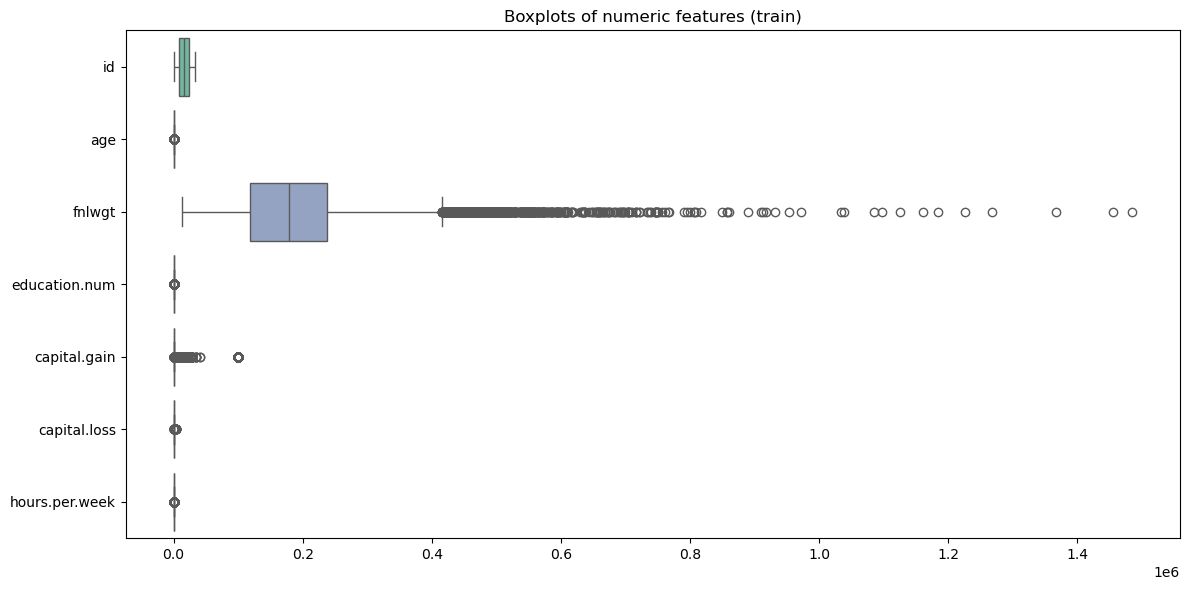

In [10]:

# --------------------------
# 시각화 - 박스플롯 - 박스플롯이란 : https://yoon1seok.tistory.com/38
# --------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 컬럼만 추출
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 6))
sns.boxplot(data=train[numeric_cols], orient="h", palette="Set2")
plt.title("Boxplots of numeric features (train)")
plt.tight_layout()
plt.show()

In [11]:
# train[train['age']<=0]
train=train[train['age']>0]
train[train['age']<=0]

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


In [12]:
y_train = train.pop("income")
print(y_train)
# print("====================================")
# print(train)

train.shape,test.shape


0         >50K
1        <=50K
2        <=50K
3         >50K
4        <=50K
         ...  
29299    <=50K
29300    <=50K
29301    <=50K
29302    <=50K
29303    <=50K
Name: income, Length: 29301, dtype: object


((29301, 15), (3257, 15))

In [ ]:
# 원핫 인코딩
train_oh=pd.get_dummies(train)
# train_oh
test_oh = pd.get_dummies(test) 
# test_oh 

print(train.shape, test.shape, train_oh.shape, test_oh.shape)
train_oh

In [ ]:
# train - test 간 인코딩시 컬럼 불일치 문제 해결

print(train.shape, test.shape)  # 원본 데이터 크기
data = pd.concat([train, test], axis=0)  # 두 데이터를 세로로 합치기
data_oh = pd.get_dummies(data)  # 합친 데이터로 원핫 인코딩
train_oh = data_oh.iloc[:len(train)].copy()  # 앞부분을 학습용으로 분리
test_oh = data_oh.iloc[len(train):].copy()  # 뒷부분을 시험용으로 분리
print(train_oh.shape, test_oh.shape)  # 분리 후 크기 확인

In [ ]:
# 원핫 인코딩 적용 주석 - 



In [13]:
#
# cols=train.select_dtypes(include="object").columns
# cols

# cols = train.columns[train.dtypes == object]
# cols

cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex','native.country']

cols


['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

In [14]:
from sklearn.preprocessing import LabelEncoder

for col in cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])



/tmp/ipykernel_8582/1301894556.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = le.fit_transform(train[col])
/tmp/ipykernel_8582/1301894556.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = le.fit_transform(train[col])
/tmp/ipykernel_8582/1301894556.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [15]:
# y 값 인코딩
y_train.value_counts()

income
<=50K    22262
>50K      7039
Name: count, dtype: int64

In [16]:

#방법1
## map() 은 딕셔너리 매핑을 통해 문자열을 숫자로 치환합니다.
target = y_train.map({'<=50K':0, '>50K':1})
target.value_counts()
target

# 방법2
# replace()도 특정 값을 다른 값으로 치환하는 방식
# 결과적으로 map()과 동일한 결과를 얻습니다.
# target = y_train.replace('<=50K', 0).replace('>50K', 1)
# target.value_counts()

0        1
1        0
2        0
3        1
4        0
        ..
29299    0
29300    0
29301    0
29302    0
29303    0
Name: income, Length: 29301, dtype: int64

In [17]:

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    train,        # 입력 데이터(독립 변수, Feature)
    y_train,      # 정답 데이터(종속 변수, Label) - sklearn 에서는 문자열클래스도 가능 / 딥러닝은 힘듬
    test_size=0.2,    # 전체 데이터의 20%를 검증용으로 분리
    random_state=0    # 데이터 분할 시 랜덤 시드 고정 (재현성) , 기본값 :데이터 무작위 셔플->성능결과달라짐
)

X_train.shape, X_val.shape, y_train.shape, y_val.shape



((23440, 15), (5861, 15), (23440,), (5861,))

In [19]:
# ----------------------------
# 랜덤포레스트
# ----------------------------
# 배깅 기반 앙상블: 여러 트리를 부트스트랩 샘플로 학습시켜 예측을 종합하는 방식
# 과적합 완화: 다수의 트리를 결합해 단일 트리보다 일반화 성능을 높임
# 변수 중요도 제공: 각 특성이 예측에 기여한 정도를 계산해 Feature Importance 제공
# 랜덤성 + 다수결: 무작위 데이터·특성으로 다양한 트리를 만들고 최종 예측은 다수결/평균으로 결정


from sklearn.ensemble import RandomForestClassifier  
# sklearn.ensemble 모듈에서 RandomForestClassifier(랜덤 포레스트 분류기) 불러오기
# 랜덤포레스트는 여러 개의 결정트리(Decision Tree)를 앙상블하여 예측 성능을 높이는 알고리즘

rf = RandomForestClassifier(random_state=0)  
# 랜덤포레스트 분류기 객체 생성
# random_state=0 → 난수 시드 고정 (재현성 확보: 같은 데이터로 돌리면 항상 같은 모델 결과 나옴)

rf.fit(X_train, y_train)  
# 모델 학습(훈련 단계)
# X_train : 학습 데이터의 입력값(Feature)
# y_train : 학습 데이터의 정답(Label)
# → 다수의 결정트리를 만들고, 학습 데이터에 대해 분류 규칙을 학습

pred = rf.predict_proba(X_val)  
# 검증 데이터(X_val)에 대해 각 클래스에 속할 **확률값**을 예측
# 반환값은 (샘플 개수 × 클래스 개수)의 2차원 배열
# 예: 이진분류라면 [ [0.2, 0.8], [0.7, 0.3], ... ] 형태로 출력
#    → 첫 번째 값은 "클래스 0일 확률", 두 번째 값은 "클래스 1일 확률"


pred[:10]  
# 예측된 확률값 중 상위 10개 샘플만 출력
# 각 행은 하나의 샘플에 대한 클래스별 확률 분포를 의미



array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.9 , 0.1 ],
       [0.63, 0.37],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.98, 0.02],
       [0.94, 0.06],
       [0.12, 0.88],
       [0.88, 0.12]])

In [20]:
# 평가하기
pred[:,1]

array([0.  , 0.  , 0.1 , ..., 0.  , 0.26, 0.  ])

In [21]:
from sklearn.metrics import  roc_auc_score
roc_auc = roc_auc_score(y_val,pred[:,1])
print('roc_auc',roc_auc)

roc_auc 0.9173016455843583


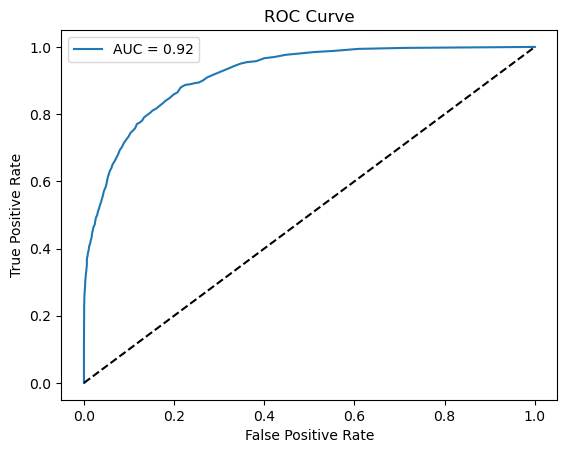

In [22]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 가정: y_val (실제값), y_pred_proba (예측확률) 데이터가 이미 준비되어 있음

y_pred_proba = pred[:,1]
# ROC 곡선 그래프
fpr, tpr, _ = roc_curve(y_val, y_pred_proba, pos_label='>50K')
auc = roc_auc_score(y_val, y_pred_proba)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import accuracy_score
pred = rf.predict(X_val)
accuracy= accuracy_score(y_val, pred)
print("accuracy_score : ",accuracy)

accuracy_score :  0.8698174372973895


In [24]:
from sklearn.metrics import f1_score

f1 = f1_score(y_val, pred,pos_label='>50K')
print('f1_score:' ,f1)

f1_score: 0.6936973103171417


In [27]:
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 24.8 MB/s eta 0:00:0000:0100:01


In [28]:
import lightgbm as lgb
lgbmc = lgb.LGBMClassifier(random_state=0, verbose=-1)
lgbmc.fit(X_train, y_train)
pred = lgbmc.predict_proba(X_val)

#---------------------
# roc
#---------------------
roc_auc = roc_auc_score(y_val, pred[:,1])
print('roc_auc:', roc_auc)
pred = lgbmc.predict(X_val)

#---------------------
# Accuracy
#---------------------
accuracy = accuracy_score(y_val, pred)
print('accuracy_score:', accuracy)
#---------------------
# f1-score
#---------------------
f1 = f1_score(y_val, pred, pos_label='>50K')
print('f1_score:', f1)


roc_auc: 0.9277697320193289
accuracy_score: 0.8771540692714553
f1_score: 0.7154150197628459


In [29]:
# 예측 결과 파일생성
pred = lgbmc.predict_proba(test)
pred

array([[0.9273184 , 0.0726816 ],
       [0.97620574, 0.02379426],
       [0.97261698, 0.02738302],
       ...,
       [0.93689095, 0.06310905],
       [0.98884756, 0.01115244],
       [0.96685322, 0.03314678]])

In [30]:
pred[:,1]

array([0.0726816 , 0.02379426, 0.02738302, ..., 0.06310905, 0.01115244,
       0.03314678])

In [33]:
submit = pd.DataFrame({'pred':pred[:,1]})
submit
submit.to_csv("submit.csv")